In this demonstration, we consider the following 1-D Gaussian mixture density function:
$$
f(x) \propto 0.5 \exp \left( \frac{(q-1)^2}{2 \times 0.35^2} \right) + 0.5 \exp \left( \frac{(q+1)^2}{2 \times 0.35^2}\right),
$$
where the right hand side is considered as the function of exponentialized negative potential energy $\exp (-U(q))$. The kinetic energy is selected as 

In [1]:
import sys
sys.path.append('../')
from hamilton_neural_network import (
    TrainTestData,
    HamiltonianNeuralNetwork,
    LatentHamiltonianNeuralNetwork,
)
from hamilton_system import HamiltonianSystem
from pdf_models import IndepedentGaussians, OneDimGaussianMixtureDensity
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(0)

2.18.0


Generating samples...
Finished generating samples.


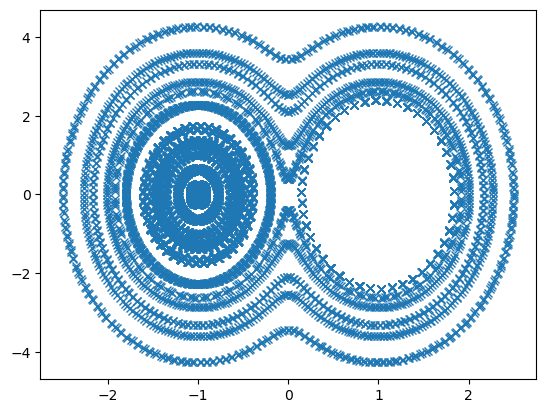

In [2]:
expU = OneDimGaussianMixtureDensity()
expK = IndepedentGaussians(tf.constant([0.0]), tf.constant([1.0]))
q0 = tf.constant([2.5])
p0 = tf.constant([0.0])
T = 20.0
leap_frog_per_unit = 20
num_samples =20
num_train = int(0.9 * num_samples * leap_frog_per_unit * T)
train_test_data = TrainTestData(
    num_samples, expU, expK, T, leap_frog_per_unit, q0, p0
)
samples = train_test_data()
tf.io.write_file("../exps/train_test_data.txt", tf.io.serialize_tensor(samples))
plt.plot(samples[:, 0], samples[:, 1], "x")
plt.show()

In [3]:
file = tf.io.read_file("../exps/train_test_data.txt")
train_test_data = tf.io.parse_tensor(file, out_type=tf.float32)
train_data = train_test_data[:num_train, :]
test_data = train_test_data[num_train:, :]
hnn = HamiltonianNeuralNetwork(3, 16)
hnn.build(input_shape=(1, 2))
train_hist, test_hist = hnn.train(15000, 1000, 1e-4, train_data, test_data)
hnn.save_weights("../exps/demo_1_hnn.weights.h5")

Training started...
Epoch 100: Train loss 1.5070239305496216, Test loss 9.112262725830078.
Epoch 200: Train loss 1.3468475341796875, Test loss 7.457500457763672.
Epoch 300: Train loss 0.9315482378005981, Test loss 4.53570032119751.
Epoch 400: Train loss 0.20650258660316467, Test loss 1.912225365638733.
Epoch 500: Train loss 0.15310049057006836, Test loss 1.2547355890274048.
Epoch 600: Train loss 0.15261034667491913, Test loss 0.816343367099762.
Epoch 700: Train loss 0.1639857143163681, Test loss 0.5672431588172913.
Epoch 800: Train loss 0.18031303584575653, Test loss 0.4814179539680481.
Epoch 900: Train loss 0.18308037519454956, Test loss 0.44346562027931213.
Epoch 1000: Train loss 0.1640693098306656, Test loss 0.37959736585617065.
Epoch 1100: Train loss 0.12804603576660156, Test loss 0.2848316729068756.
Epoch 1200: Train loss 0.09077561646699905, Test loss 0.19497977197170258.
Epoch 1300: Train loss 0.06135556101799011, Test loss 0.12836313247680664.
Epoch 1400: Train loss 0.041028931

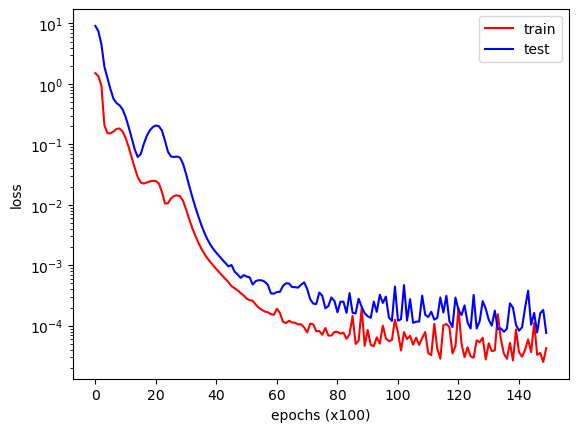

In [4]:
ax, fig = plt.subplots()
fig.plot(train_hist, label="train", color="red")
fig.plot(test_hist, label="test", color="blue")
fig.legend()
fig.set_yscale("log")
fig.set_xlabel("epochs (x100)")
fig.set_ylabel("loss")
plt.show()

In [5]:
file = tf.io.read_file("../exps/train_test_data.txt")
train_test_data = tf.io.parse_tensor(file, out_type=tf.float32)
train_data = train_test_data[:num_train, :]
test_data = train_test_data[num_train:, :]
lhnn = LatentHamiltonianNeuralNetwork(3, 16, 4)
lhnn.build(input_shape=(1, 2))
train_hist, test_hist = lhnn.train(15000, 1000, 4e-5, train_data, test_data)
lhnn.save_weights("../exps/demo_1_lhnn.weights.h5")

Training started...
Epoch 0: Train loss 3.4848034381866455, Test loss 14.005769729614258.
Epoch 100: Train loss 1.767261028289795, Test loss 10.537637710571289.
Epoch 200: Train loss 1.5481154918670654, Test loss 9.401145935058594.
Epoch 300: Train loss 1.3640753030776978, Test loss 8.260855674743652.
Epoch 400: Train loss 1.2644096612930298, Test loss 7.081926345825195.
Epoch 500: Train loss 1.2733850479125977, Test loss 6.060786247253418.
Epoch 600: Train loss 1.3379331827163696, Test loss 5.2856831550598145.
Epoch 700: Train loss 1.4001798629760742, Test loss 4.68834924697876.
Epoch 800: Train loss 1.4371542930603027, Test loss 4.178697109222412.
Epoch 900: Train loss 1.433623194694519, Test loss 3.691319704055786.
Epoch 1000: Train loss 1.3673168420791626, Test loss 3.191253185272217.
Epoch 1100: Train loss 1.2155197858810425, Test loss 2.677018642425537.
Epoch 1200: Train loss 0.9721220135688782, Test loss 2.181295394897461.
Epoch 1300: Train loss 0.6741281151771545, Test loss 1.7

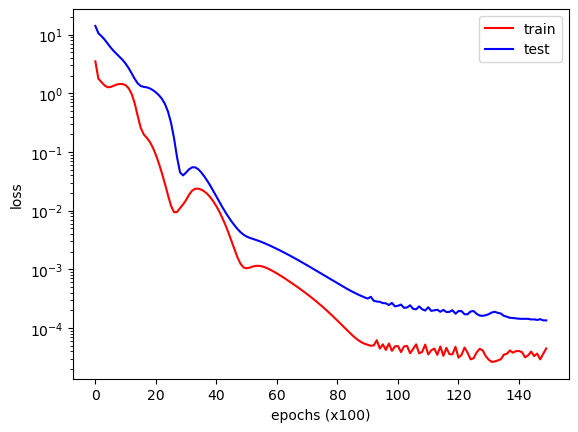

In [6]:
ax, fig = plt.subplots()
fig.plot(train_hist, label="train", color="red")
fig.plot(test_hist, label="test", color="blue")
fig.legend()
fig.set_yscale("log")
fig.set_xlabel("epochs (x100)")
fig.set_ylabel("loss")
plt.show()

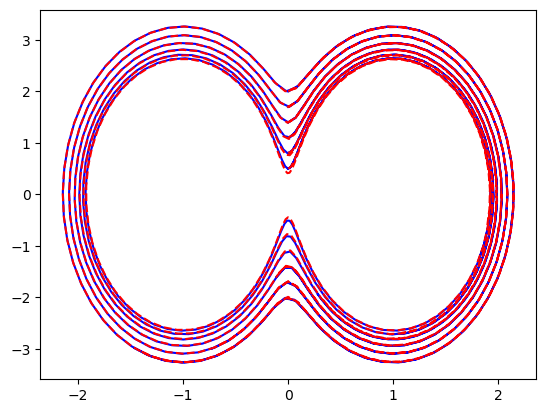

In [8]:
hnn = HamiltonianNeuralNetwork(3, 16)
hnn.build(input_shape=(1, 2))
q0 = tf.constant([0.0])
hnn.load_weights("../exps/demo_1_hnn.weights.h5")

fig, ax = plt.subplots()
p_list = tf.linspace(0.5, 2.0, 6)
dt = 1.0 / 20
n_steps = 120
original_hamiltonian = HamiltonianSystem(expU, expK)

for i in range(6):
    p0 = tf.constant([p_list[i].numpy()])
    hist_original = original_hamiltonian.symplectic_integrate(q0, p0, dt, n_steps)
    hist_hnn = hnn.symplectic_integrate(q0, p0, dt, n_steps)
    ax.plot(
        hist_original[:, 0],
        hist_original[:, 1],
        label="Numerical gradients",
        color="blue",
    )
    ax.plot(
        hist_hnn[:, 0],
        hist_hnn[:, 1],
        color="red",
        label="HNNs",
        linestyle="--",
    )
plt.show()

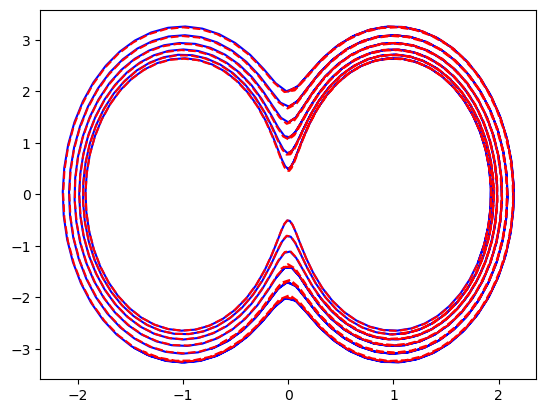

In [9]:
lhnn = LatentHamiltonianNeuralNetwork(3, 16, 4)
lhnn.build(input_shape=(1, 2))
q0 = tf.constant([0.0])
lhnn.load_weights("../exps/demo_1_lhnn.weights.h5")

fig, ax = plt.subplots()
p_list = tf.linspace(0.5, 2.0, 6)
dt = 1.0 / 20
n_steps = 120
original_hamiltonian = HamiltonianSystem(expU, expK)

for i in range(6):
    p0 = tf.constant([p_list[i].numpy()])
    hist_original = original_hamiltonian.symplectic_integrate(q0, p0, dt, n_steps)
    hist_lhnn = lhnn.symplectic_integrate(q0, p0, dt, n_steps)
    ax.plot(
        hist_original[:, 0],
        hist_original[:, 1],
        label="Numerical gradients",
        color="blue",
    )
    ax.plot(
        hist_lhnn[:, 0],
        hist_lhnn[:, 1],
        color="red",
        label="HNNs",
        linestyle="--",
    )
plt.show()